# Tutorial 2

## Outline
* random numbers
* pandas
* Simulated Annealing
* Q&A on HW#1


## Random Numbers

In [1]:
import numpy as np

Generate a random integer

In [2]:
np.random.randint(1,10)

8

Generate a vector of 10 random numbers

In [3]:
np.random.random(10)
np.random.random(10)*2-1
np.random.random((2,3))

array([[0.24193187, 0.87472812, 0.08543209],
       [0.3055503 , 0.46941673, 0.95593163]])

Generate a 3d vector with norm of 5

In [4]:
import numpy.linalg as LA
r = np.random.random(3)*2-1
r/LA.norm(r)*5

array([-2.84419111,  2.91892012,  2.89663292])

More on using numpy.random (https://numpy.org/doc/stable/reference/random/index.html)

## Pandas and operations on dataset

Read in a .csv file <br>
Use the famous wines.csv dataset (provided on bcourse)

In [5]:
import pandas as pd


df=pd.read_csv('~/Downloads/wines.csv')
df

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1
2,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1,1
3,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280,1,1
4,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630,3,3
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3,3
175,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3,3
176,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,3,3


I want to drop the last two columns and keep only the chemical descriptors

In [6]:
feats = df.drop(["Start assignment","ranking"],axis=1)
feats

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
2,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
3,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
4,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840
176,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560


Computing min,max and average for a specific chemical descriptor

In [7]:
np.max(feats['Phenols'])
np.average(feats['Phenols'])
np.average(feats,axis=0)

array([1.30006180e+01, 2.33634831e+00, 2.36651685e+00, 1.94949438e+01,
       9.97415730e+01, 2.29511236e+00, 2.02926966e+00, 3.61853933e-01,
       1.59089888e+00, 5.05808988e+00, 9.57449438e-01, 2.61168539e+00,
       7.46893258e+02])

Find the index with largest Ash

In [8]:
np.argmax(feats['Ash'])

154

Find entry by index in a DataFrame

In [9]:
df.iloc[154]

Alcohol %            11.56
Malic Acid            2.05
Ash                   3.23
Alkalinity           28.50
Mg                  119.00
Phenols               3.18
Flavanoids            5.08
Phenols.1             0.47
Proantho-cyanins      1.87
Color intensity       6.00
Hue                   0.93
OD280 315             3.69
Proline             465.00
Start assignment      3.00
ranking               2.00
Name: 154, dtype: float64

In [10]:
df.iloc[154,2]

3.23

In [11]:
df.iloc[:,2]

0      2.43
1      2.87
2      2.17
3      2.32
4      2.41
       ... 
173    2.86
174    2.26
175    2.37
176    2.74
177    2.12
Name: Ash, Length: 178, dtype: float64

Find a subset of data that have Start assignment of 1

In [12]:
feats[df['Start assignment']==1]

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.040,3.92,1065
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.040,2.93,735
2,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.080,2.85,1045
3,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.170,2.82,1280
4,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.150,2.90,1320
5,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.070,2.65,1280
6,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.090,3.71,780
7,12.85,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.090,3.63,1015
8,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.120,3.82,845
9,13.30,1.72,2.14,17.0,94,2.40,2.19,0.27,1.35,3.95,1.020,2.77,1285


## Simulated annealing

Try to find the global minimum of the three-hump Camel function using simulated annealing

Three-Hump Camel function
$f(x,y)=2x^2-1.05x^4+x^6/6+xy+y^2$

In [13]:
from pylab import *
from mpl_toolkits.mplot3d import axes3d

In [14]:
def Camel(X):
    x,y=X
    return 2*x**2-1.05*x**4+x**6/6+x*y+y**2



In [15]:
def plot_surface(func,x_min=-2,x_max=2,y_min=-2,y_max=2):
    a=np.linspace(x_min,x_max,100)
    b=np.linspace(y_min,y_max,100)
    x,y=np.meshgrid(a,b)
    z=func((x,y))
    fig=plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(x,y,z)

/var/folders/lp/p_fjrj654p734sb65s21gfcm0000gp/T/ipykernel_3356/2044554396.py:7: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


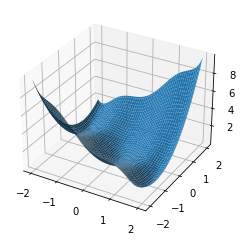

In [16]:
plot_surface(Camel)

In [17]:
def SA(solution,cooling_schedule):
    best_solution=solution.copy()
    lowest_eval=Camel(best_solution)
    for idx,temp in enumerate(cooling_schedule):
        if idx%500==0:
            print("%d/%d   temp:%f"%(idx,len(cooling_schedule),temp))
        for n in range(len(solution)):
            trial = solution.copy()
            trial[n] += (np.random.random()*2-1)*0.1
            if trial[n]>-2 and trial[n]<2:
                if np.exp(-(Camel(trial)-Camel(solution))/temp) > np.random.random():
                    solution = trial
                    if Camel(solution) <lowest_eval:
                        best_solution = solution
                        lowest_eval = Camel(solution)
    return {"solution":best_solution,"evaluation":lowest_eval}

Try linear cooling first

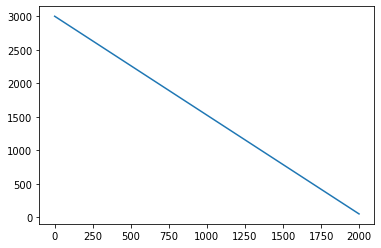

In [18]:
linear_cooling = np.linspace(3000,50,2000)
plt.plot(linear_cooling)

In [19]:
SA([2,2],linear_cooling)

0/2000   temp:3000.000000
500/2000   temp:2262.131066
1000/2000   temp:1524.262131
1500/2000   temp:786.393197


{'solution': [0.2329457003232459, 0.22700121453948924],
 'evaluation': 0.20987076073514593}

Create a schedule of heating and cooling

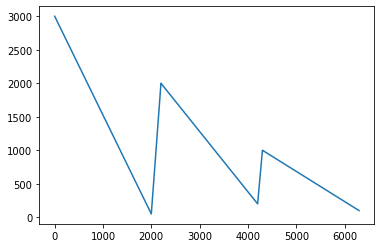

In [20]:
schedule=np.append(linear_cooling,np.linspace(linear_cooling[-1],2000,200))
schedule=np.append(schedule,np.linspace(schedule[-1],200,2000))
schedule=np.append(schedule,np.linspace(schedule[-1],1000,100))
schedule=np.append(schedule,np.linspace(schedule[-1],100,2000))
plt.figure()
plt.plot(schedule)

In [21]:
SA([2,2],schedule)

0/6300   temp:3000.000000
500/6300   temp:2262.131066
1000/6300   temp:1524.262131
1500/6300   temp:786.393197
2000/6300   temp:50.000000
2500/6300   temp:1729.864932
3000/6300   temp:1279.639820
3500/6300   temp:829.414707
4000/6300   temp:379.189595
4500/6300   temp:909.954977
5000/6300   temp:684.842421
5500/6300   temp:459.729865
6000/6300   temp:234.617309


{'solution': [7.958352429802626e-05, 0.007838946187992031],
 'evaluation': 6.208559537729504e-05}

## HW#1 Discussion

In [22]:
#Mostly debugging and discussion surrounding Stochastic Gradient Descent with Momentum